<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Creational-Design-Patterns" data-toc-modified-id="Creational-Design-Patterns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creational Design Patterns</a></span></li><li><span><a href="#Prototype-Method" data-toc-modified-id="Prototype-Method-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prototype Method</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Without-prototype-method" data-toc-modified-id="Without-prototype-method-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Without prototype method</a></span></li><li><span><a href="#With-prototype-method" data-toc-modified-id="With-prototype-method-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>With prototype method</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-warning">
<font color=black>

**What?** Creational Design Patterns - Prototype Method

</font>
</div>

# Creational Design Patterns
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-info">
<font color=black>

- **Creational Design Patterns** are about class instantiation or the object instantiation. 
    - [ ] Factory Method
    - [ ] Abstract Factory Method
    - [ ] Builder Method
    - [x] Prototype Method
    - [ ] Singleton Method

</font>
</div>

# Prototype Method
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-info">
<font color=black>

- **Prototype is a creational design pattern that lets you copy existing objects without making your code dependent on their classes.**
- Prototype Method is a Creational Design Pattern which aims to reduce the number of classes used for an application. It allows you to copy existing objects independent of the concrete implementation of their classes. Generally, here the object is created by copying a prototypical instance during run-time. 
    
</font>
</div>

# Example
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-info">
<font color=black>

- Let's assume that there is an institution which provides courses like SDE, DSA, STL, etc.
- Creating objects for similar courses, again and again, is not a good task to utilize the resources in a better way.
    
</font>
</div>

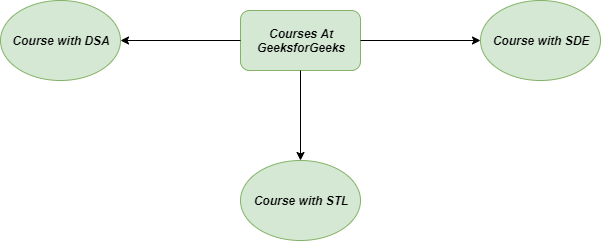

# Without prototype method
<hr style = "border:2px solid black" ></hr>

In [1]:
# concrete course
class DSA():
    """Class for Data Structures and Algorithms"""

    def Type(self):
        return "Data Structures and Algorithms"

    def __str__(self):
        return "DSA"


# concrete course
class SDE():
    """Class for Software development Engineer"""

    def Type(self):
        return "Software Development Engineer"

    def __str__(self):
        return "SDE"


# concrete course
class STL():
    """class for Standard Template Library of C++"""

    def Type(self):
        return "Standard Template Library"

    def __str__(self):
        return "STL"

In [2]:
sde = SDE() # object for SDE
dsa = DSA() # object for DSA
stl = STL() # object for STL

print(f'Name of Course: {sde} and its type: {sde.Type()}')
print(f'Name of Course: {stl} and its type: {stl.Type()}')
print(f'Name of Course: {dsa} and its type: {dsa.Type()}')

Name of Course: SDE and its type: Software Development Engineer
Name of Course: STL and its type: Standard Template Library
Name of Course: DSA and its type: Data Structures and Algorithms


# With prototype method
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-info">
<font color=black>

- We would create separate classes for Courses_At_GFG and Course_At_GFG_Cache which will help us in creating the exact copy of already existing object with the same field properties.
- This method delegates the cloning process to the actual objects that are being cloned.
- Here we declare a common interface or class which supports object cloning which allows us to clone the object without coupling our code to the class of that method. 
- `@staticmethod` is a class decorator without access to `self`; it provides a mechanism to attached method to class (hence improving the findability) and it allows to protect the method usage.
- `@abstarctmethod` is a class decorator which is used to define an abstract method. This is a method that is declared, but contains no implementation. 
    
</font>
</div>

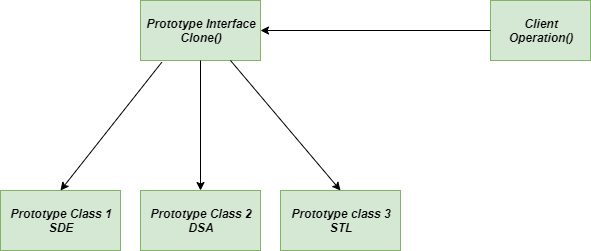

In [4]:
# import the required modules
from abc import ABCMeta, abstractmethod
import copy


# class - Courses at GeeksforGeeks
class Courses_At_GFG(metaclass=ABCMeta):

    # constructor
    def __init__(self):
        self.id = None
        self.type = None

    @abstractmethod
    def course(self):
        pass

    def get_type(self):
        return self.type

    def get_id(self):
        return self.id

    def set_id(self, sid):
        self.id = sid

    def clone(self):
        return copy.copy(self)

# class - DSA course
class DSA(Courses_At_GFG):
    def __init__(self):
        super().__init__()
        self.type = "Data Structures and Algorithms"

    def course(self):
        print("Inside DSA::course() method")

# class - SDE Course
class SDE(Courses_At_GFG):
    def __init__(self):
        super().__init__()
        self.type = "Software Development Engineer"

    def course(self):
        print("Inside SDE::course() method.")

# class - STL Course


class STL(Courses_At_GFG):
    def __init__(self):
        super().__init__()
        self.type = "Standard Template Library"

    def course(self):
        print("Inside STL::course() method.")

# class - Courses At GeeksforGeeks Cache


class Courses_At_GFG_Cache:

    # cache to store useful information
    cache = {}

    @staticmethod
    def get_course(sid):
        COURSE = Courses_At_GFG_Cache.cache.get(sid, None)
        return COURSE.clone()

    @staticmethod
    def load():
        sde = SDE()
        sde.set_id("1")
        Courses_At_GFG_Cache.cache[sde.get_id()] = sde

        dsa = DSA()
        dsa.set_id("2")
        Courses_At_GFG_Cache.cache[dsa.get_id()] = dsa

        stl = STL()
        stl.set_id("3")
        Courses_At_GFG_Cache.cache[stl.get_id()] = stl

In [5]:
Courses_At_GFG_Cache.load()

sde = Courses_At_GFG_Cache.get_course("1")
print(sde.get_type())

dsa = Courses_At_GFG_Cache.get_course("2")
print(dsa.get_type())

stl = Courses_At_GFG_Cache.get_course("3")
print(stl.get_type())

Software Development Engineer
Data Structures and Algorithms
Standard Template Library


# Conclusions
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-danger">
<font color=black>

- **Advantages**:
    - You can clone objects without coupling to their concrete classes.
    - You can get rid of repeated initialization code in favor of cloning pre-built prototypes.
    - You can produce complex objects more conveniently.
    - You get an alternative to inheritance when dealing with configuration presets for complex objects.
- **Disadvantages**:
    - Cloning complex objects that have circular references might be very tricky.
    - Waste of resources at lower level: It might be proved as the overkill of resources for a project that uses very few objects.
    
</font>
</div>

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-warning">
<font color=black>

- [Prototype](https://refactoring.guru/design-patterns/prototype)
- [`@staticmethod`](https://github.com/kyaiooiayk/Awesome-Python-Programming-Notes/blob/main/tutorials/Built-in%20Decorators/%40staticmethod.ipynb)
- [`@abstractmethod`](https://github.com/kyaiooiayk/Awesome-Python-Programming-Notes/blob/main/tutorials/Abstract%20and%20virtual%20abstract%20class.ipynb)

</font>
</div>